In [52]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np
sns.set(style="darkgrid", color_codes=True)

#import dataset
iris = pd.read_csv("IRIS.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
iris["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<AxesSubplot: xlabel='sepal_length', ylabel='sepal_width'>

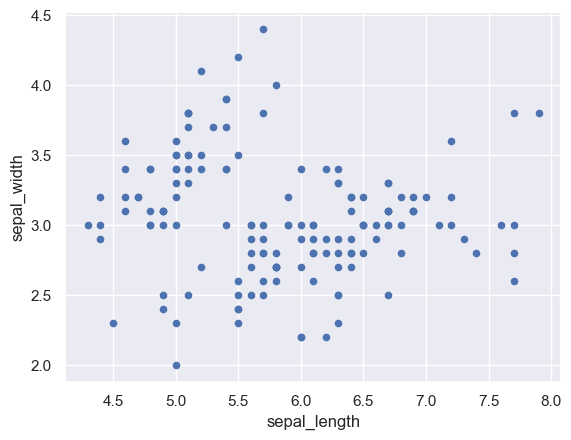

In [54]:
iris.plot(kind="scatter",x="sepal_length", y="sepal_width")

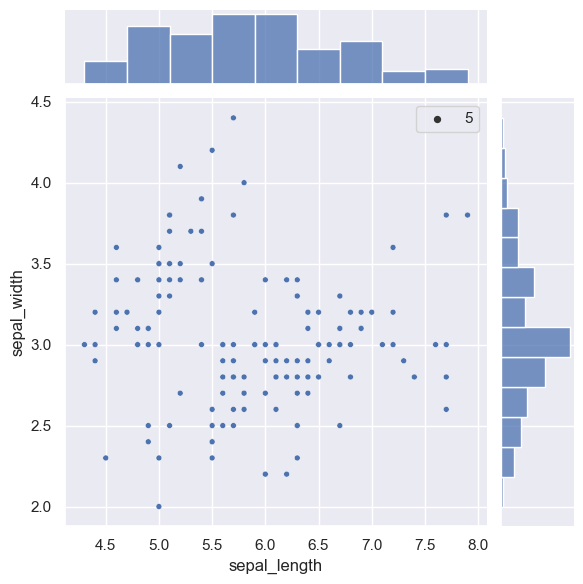

In [55]:
#plot a jointplot using seaborn, shows bivariate scatter plots and univariate histograms
sns.jointplot(x="sepal_length",y="sepal_width", data=iris, size = 5)

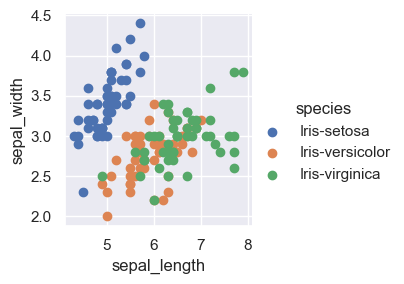

In [56]:
# to colour the scatter plot  by species
sns.FacetGrid(iris, hue = "species")\
.map(plt.scatter, "sepal_length" ,"sepal_width")\
.add_legend()

<AxesSubplot: xlabel='species', ylabel='petal_length'>

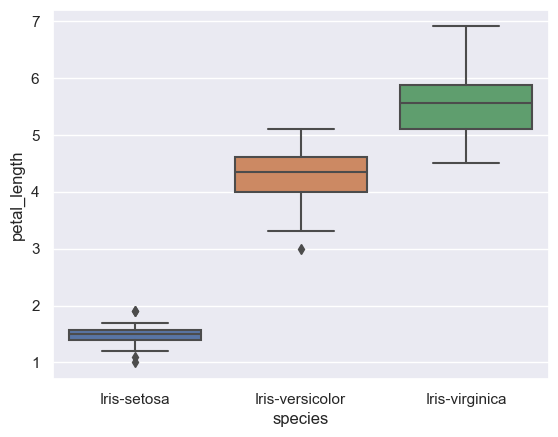

In [57]:
#boxplot
sns.boxplot(x="species",y="petal_length", data =iris)

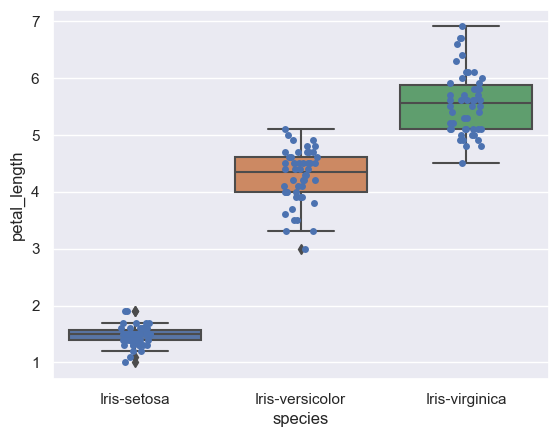

In [58]:
ax = sns.boxplot(x="species", y="petal_length", data=iris)
ax = sns.stripplot(x="species", y="petal_length", data=iris, jitter=True, edgecolor="gray")

<AxesSubplot: xlabel='species', ylabel='petal_length'>

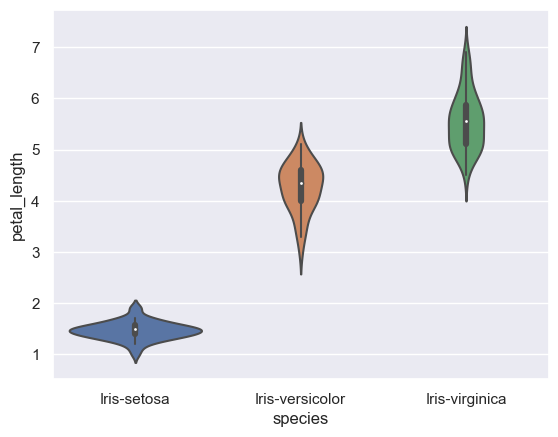

In [59]:
#combine the stripplot and the boxplot with thne violin plot
sns.violinplot(x="species", y="petal_length",data=iris, size=6)

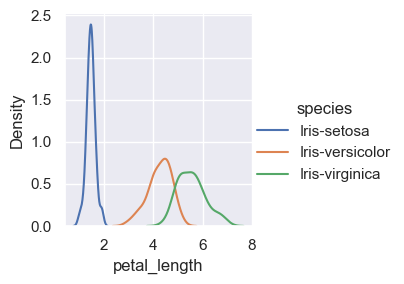

In [60]:
#kdeplot to visualize a kernel density estimate of the underlying feature
sns.FacetGrid(iris ,hue="species")\
        .map(sns.kdeplot,"petal_length")\
        .add_legend()

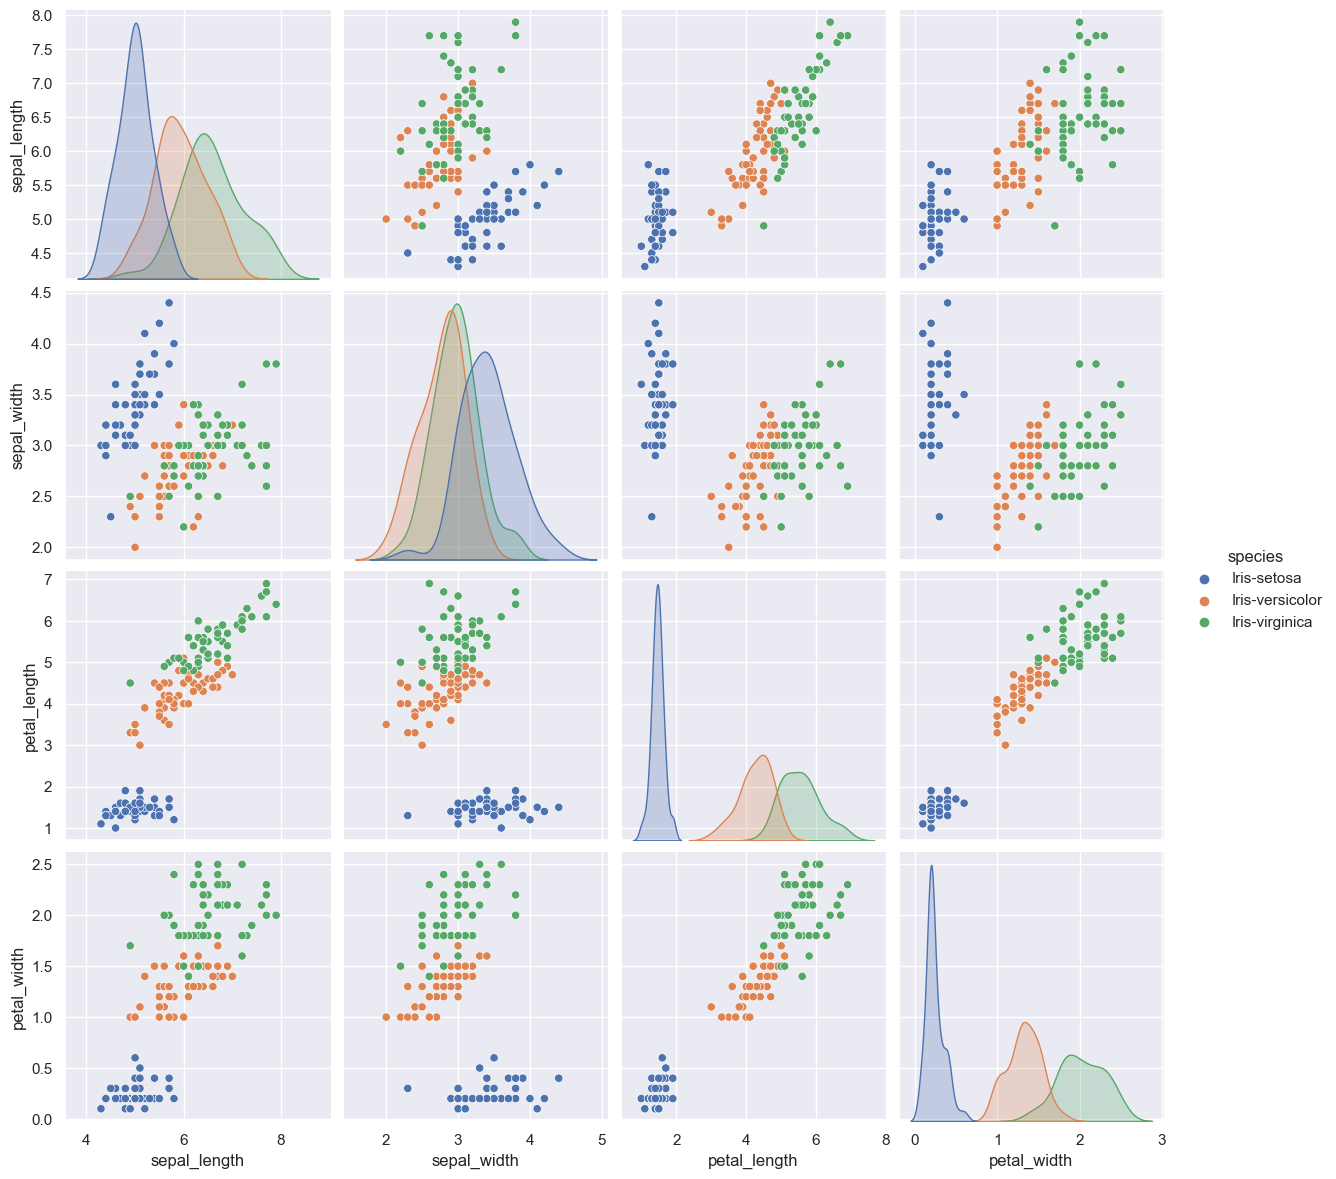

In [61]:
sns.pairplot(hue="species", size=3, data=iris)

<AxesSubplot: >

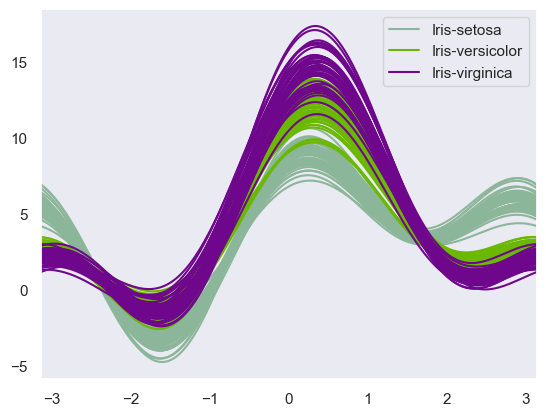

In [62]:
#Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.plotting import andrews_curves
andrews_curves(iris, "species")

<AxesSubplot: >

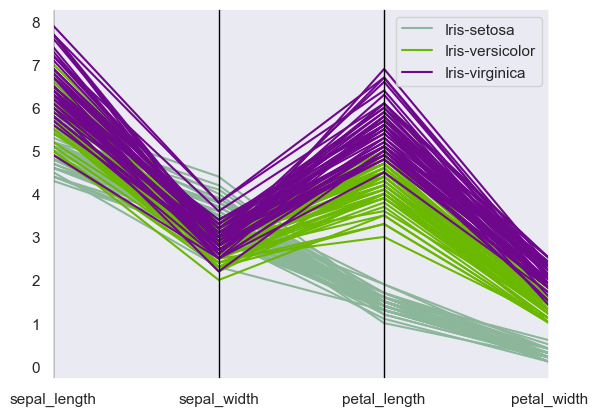

In [63]:
#Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris, "species")

<AxesSubplot: >

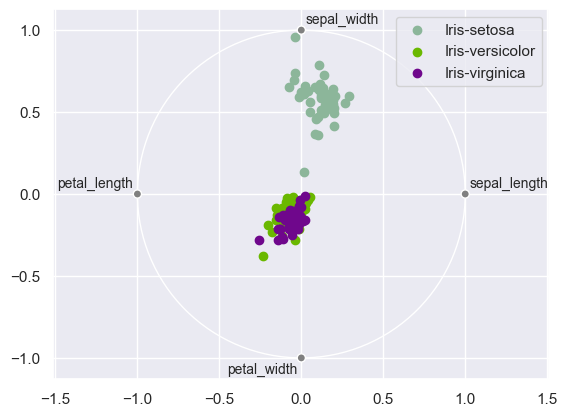

In [64]:
# radviz puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.plotting import radviz
radviz(iris, 'species')

LINEAR REGRESSION
PROBLEM: PREDICT THE SEPAL LENGTH OF THE IRIS FLOWERS

In [68]:
iris.drop("species", axis=1, inplace=True)
x = iris.drop(labels="sepal_length", axis=1)
y= iris["sepal_length"]
#splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,
    test_size =0.33, random_state = 101)
#initializing the linear regression model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
#training/fitting the model
lm.fit(x_train, y_train)
#making predictions
lm.predict(x_test)
prediction = lm.predict(x_test)


In [70]:
#testing the model
iris.loc[6]

sepal_length    4.6
sepal_width     3.4
petal_length    1.4
petal_width     0.3
Name: 6, dtype: float64

In [72]:
d = {'sepal_length': [4.6],
'sepal_width'     :[3.4],
'petal_length'  :  [1.4],
'petal_width'    : [0.3]}
test_df =pd.DataFrame(data=d)
test_df

,sepal_length,sepal_width,petal_length,petal_width
0,4.6,3.4,1.4,0.3


In [73]:
print('Predicted sepal length:',prediction[0])
print('Actual sepal length:',4.6)

Predicted sepal length: 5.503989627387517
Actual sepal length: 4.6


In [ ]:
#evaluating models perfomance
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test,prediction)))

MAE: 0.2635470752797692
MSE: 0.10678921389067901
RMSE: 0.32678618987141883


In [78]:
#check accuracy of the model
from sklearn.metrics import r2_score
r2 =r2_score(y_test, prediction)
print('R-squared score:', r2)

R-squared score: 0.8392203297058715


There is a disrepancy between the actual and the predicted values of the sepal length. The model is 83.9% accurate.